In [1]:
#importing important liabrary for analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import read_csv

In [2]:
#importing dataset
df=pd.read_csv("C:/Users/Lenovo/Downloads/titanic (2).csv")
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


# Analysis of imported dataset

## 1)Plotting Countplot for survived vs sex 

<AxesSubplot:xlabel='Survived', ylabel='count'>

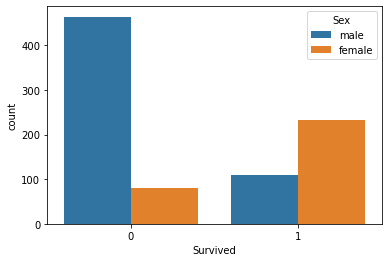

In [3]:
sns.countplot(x="Survived",hue="Sex",data=df)

### Here we get data of survived people with according to their sexin titanic. '0' is for dead and '1' is for live. so we can analyse from countplot that count of male is high in terms of death while female are less in titanic . female are more in terms of live than male in titanic.

## 2)Find out the number of missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [5]:
df.isnull()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
882,False,False,False,False,False,False,False,False
883,False,False,False,False,False,False,False,False
884,False,False,False,False,False,False,False,False
885,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

### Here we can see their is no null values in given dataset.

# 3)Boxplot for P-class and age

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

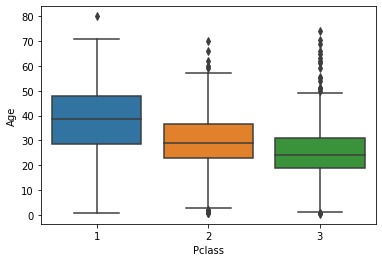

In [7]:
sns.boxplot(x="Pclass",y="Age",data=df)

### Here we can see passengers who are travelling in class 3 is younger than passengers who are travelling in class 1 and 2.

# 4)Heatmap to check for null values

<AxesSubplot:>

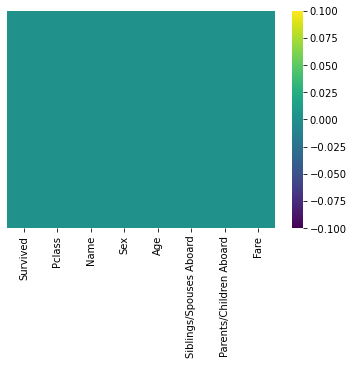

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

### From above heatmap we can view that their is no null values present in given dataset. 

#  Cleaning the data for logistic regression

### We have to create dummies with the get_dummies of "Sex" and "Pclass" column

In [9]:
sex=pd.get_dummies(df["Sex"],drop_first=True)
sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [10]:
pcl=pd.get_dummies(df["Pclass"],drop_first=True)
pcl.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


### We concatenate given data, "sex" and "pcl" column

In [11]:
df=pd.concat([df,sex,pcl],axis=1)

In [12]:
df.head(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male,2,3
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,1,0,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,0,0,0
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,0,0,1
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,0,0,0
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,1,0,1


### Now from above data here after we created "sex","pcl" columns in given dataset so "Sex","Pclass" columns are not usefull for us and we didnt required "Name" column since it did'nt contribute much in our dataset so we drop this columns from given dataset.

In [13]:
df.drop(["Pclass","Name","Sex"],axis=1,inplace=True)
df.head(5)

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male,2,3
0,0,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,0
4,0,35.0,0,0,8.0500,1,0,1


### Now our dataset is ready for performing logistic regression

# Logistic Regression

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X=df.drop("Survived",axis=1)
y=df["Survived"]

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
logmodel=LogisticRegression()

In [19]:
logmodel.fit(X_train,y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
predictions=logmodel.predict(X_test)

In [21]:
from sklearn.metrics import classification_report

In [22]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.81      0.81      0.81       162\n           1       0.70      0.70      0.70       105\n\n    accuracy                           0.77       267\n   macro avg       0.76      0.76      0.76       267\nweighted avg       0.77      0.77      0.77       267\n'

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
confusion_matrix(y_test,predictions)

array([[131,  31],
       [ 31,  74]], dtype=int64)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(y_test,predictions)

0.7677902621722846

### So our accuracy is 76.7% in above model that we created.